In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as L
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers

import matplotlib.pyplot as plt


In [2]:
TRAIN_DIR = 'C:\\Users\\himan\\Downloads\\archive (10)\\'

In [3]:
img_datagen = ImageDataGenerator(rescale=1./255,
                                vertical_flip=True,
                                horizontal_flip=True,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.1,
                                validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = img_datagen.flow_from_directory(TRAIN_DIR,
                                                 shuffle=True,
                                                 batch_size=32,
                                                 subset='training',
                                                 target_size=(100, 100))

valid_generator = img_datagen.flow_from_directory(TRAIN_DIR,
                                                 shuffle=True,
                                                 batch_size=16,
                                                 subset='validation',
                                                 target_size=(100, 100))

Found 1814 images belonging to 7 classes.
Found 452 images belonging to 7 classes.


In [6]:
# Define the MobileNetV2 base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Freeze the layers of the base model
base_model.trainable = False

# Create a Sequential model
model = keras.Sequential()

# Add the MobileNetV2 base model
model.add(base_model)

# Add additional layers on top of the base model
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 4, 4, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 2587719 (9.87 MB)
Trainable params: 3297

In [7]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') >= 0.997):
            print("\nReached 99.7% accuracy so cancelling training!")
            self.model.stop_training = True

early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode='max',
                                        restore_best_weights=True)
            
history = model.fit(train_generator, validation_data=valid_generator,
                   steps_per_epoch=train_generator.n//train_generator.batch_size,
                   validation_steps=valid_generator.n//valid_generator.batch_size,
                    callbacks=[early],
                   epochs=10)


Epoch 1/10



56/56 [==============================] - 59s 743ms/step - loss: 0.9827 - accuracy: 0.6655 - val_loss: 0.5067 - val_accuracy: 0.7969
Epoch 2/10
56/56 [==============================] - 35s 633ms/step - loss: 0.4976 - accuracy: 0.8114 - val_loss: 0.5165 - val_accuracy: 0.8125
Epoch 3/10
56/56 [==============================] - 30s 529ms/step - loss: 0.4469 - accuracy: 0.8260 - val_loss: 0.4772 - val_accuracy: 0.8125
Epoch 4/10
56/56 [==============================] - 34s 604ms/step - loss: 0.4205 - accuracy: 0.8423 - val_loss: 0.4818 - val_accuracy: 0.8058
Epoch 5/10
56/56 [==============================] - 35s 631ms/step - loss: 0.3988 - accuracy: 0.8530 - val_loss: 0.4062 - val_accuracy: 0.8393
Epoch 6/10
56/56 [==============================] - 34s 599ms/step - loss: 0.3685 - accuracy: 0.8620 - val_loss: 0.3954 - val_accuracy: 0.8460
Epoch 7/10
56/56 [==============================] - 31s 554ms/step - loss: 0.3532 - accuracy: 0.8676 - val_loss: 0.3797 - val_accuracy: 0.8683
Epoch 8/10

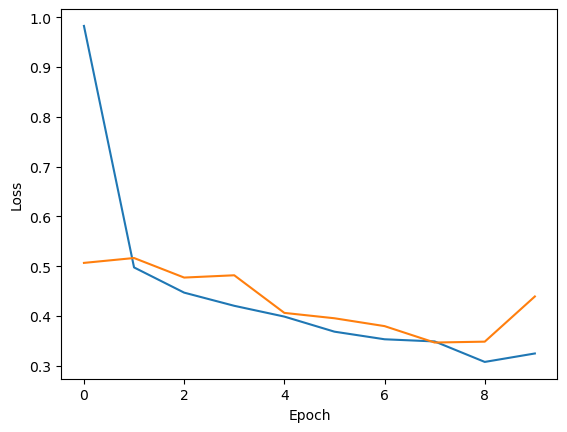

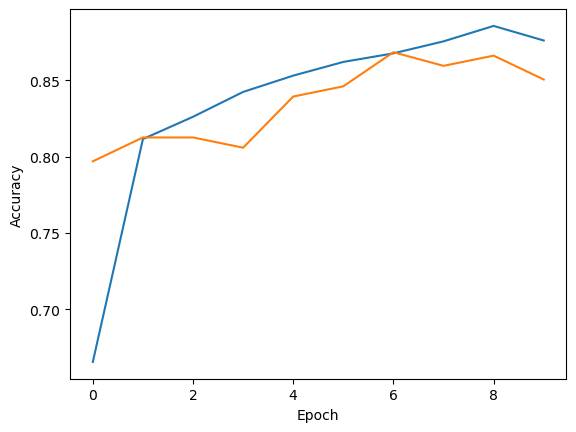

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [9]:
from keras.preprocessing import image
import numpy as np
# Load and preprocess a new image for prediction
img_path = 'C:\\Users\\himan\\OneDrive\\Documents\\test_image.jpg'
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to be between 0 and 1

# Make a prediction
predictions = model.predict(img_array)

# Get the predicted class (assuming a classification task)
predicted_class = np.argmax(predictions[0])

# Print the predicted class
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 5s 5s/step
Predicted class: 0


In [10]:
from keras.preprocessing import image
import numpy as np
# Load and preprocess a new image for prediction
img_path = 'C:\\Users\\himan\\OneDrive\\Documents\\test_image1.jpg'
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to be between 0 and 1

# Make a prediction
predictions = model.predict(img_array)

# Get the predicted class (assuming a classification task)
predicted_class = np.argmax(predictions[0])

# Print the predicted class
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 168ms/step
Predicted class: 1


In [11]:
from keras.preprocessing import image
import numpy as np
# Load and preprocess a new image for prediction
img_path = 'C:\\Users\\himan\\OneDrive\\Documents\\test_image2.jpg'
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to be between 0 and 1

# Make a prediction
predictions = model.predict(img_array)

# Get the predicted class (assuming a classification task)
predicted_class = np.argmax(predictions[0])

# Print the predicted class
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 250ms/step
Predicted class: 6


In [12]:
from keras.preprocessing import image
import numpy as np
# Load and preprocess a new image for prediction
img_path = 'C:\\Users\\himan\\OneDrive\\Documents\\test_image3.jpg'
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to be between 0 and 1

# Make a prediction
predictions = model.predict(img_array)

# Get the predicted class (assuming a classification task)
predicted_class = np.argmax(predictions[0])

# Print the predicted class
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 300ms/step
Predicted class: 3


In [13]:
from keras.preprocessing import image
import numpy as np
# Load and preprocess a new image for prediction
img_path = 'Downloads\\img_test.jpg'
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to be between 0 and 1

# Make a prediction
predictions = model.predict(img_array)

# Get the predicted class (assuming a classification task)
predicted_class = np.argmax(predictions[0])

# Print the predicted class
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 401ms/step
Predicted class: 0
